<a href="https://colab.research.google.com/github/mihikaDhaks/FFCS_Submission_RAS/blob/main/Pokemon_Rock_Normal_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
!git clone https://github.com/jesherjoshua/RAS-Workshop/
!git push https://github.com/mihikaDhaks/mika.git

Cloning into 'RAS-Workshop'...
remote: Enumerating objects: 976, done.
remote: Counting objects: 100% (976/976), done.
remote: Compressing objects: 100% (954/954), done.
remote: Total 976 (delta 19), reused 960 (delta 12), pack-reused 0
Receiving objects: 100% (976/976), 11.56 MiB | 11.47 MiB/s, done.
Resolving deltas: 100% (19/19), done.
fatal: not a git repository (or any of the parent directories): .git


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import matplotlib.image as mpimg
import tensorflow as tf
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load Data

In [3]:
df=pd.read_csv('/content/RAS-Workshop/data/pokemon.csv')

In [4]:
data_path='/content/RAS-Workshop/data/images/'
df['filepath']=[data_path+i+'.png' for i in df['name']]

In [5]:
df=df.query("type=='Rock' | type=='Normal'")
df.index=range(len(df))

In [6]:
df.head()

,name,type,filepath
0,pidgey,Normal,/content/RAS-Workshop/data/images/pidgey.png
1,pidgeotto,Normal,/content/RAS-Workshop/data/images/pidgeotto.png
2,pidgeot,Normal,/content/RAS-Workshop/data/images/pidgeot.png
3,rattata,Normal,/content/RAS-Workshop/data/images/rattata.png
4,raticate,Normal,/content/RAS-Workshop/data/images/raticate.png


In [7]:
df['onehot']=tf.keras.utils.to_categorical(LabelEncoder().fit_transform(df.type)).tolist()

In [8]:
len(df)

151

In [9]:
df.isna().sum()

name        0
type        0
filepath    0
onehot      0
dtype: int64

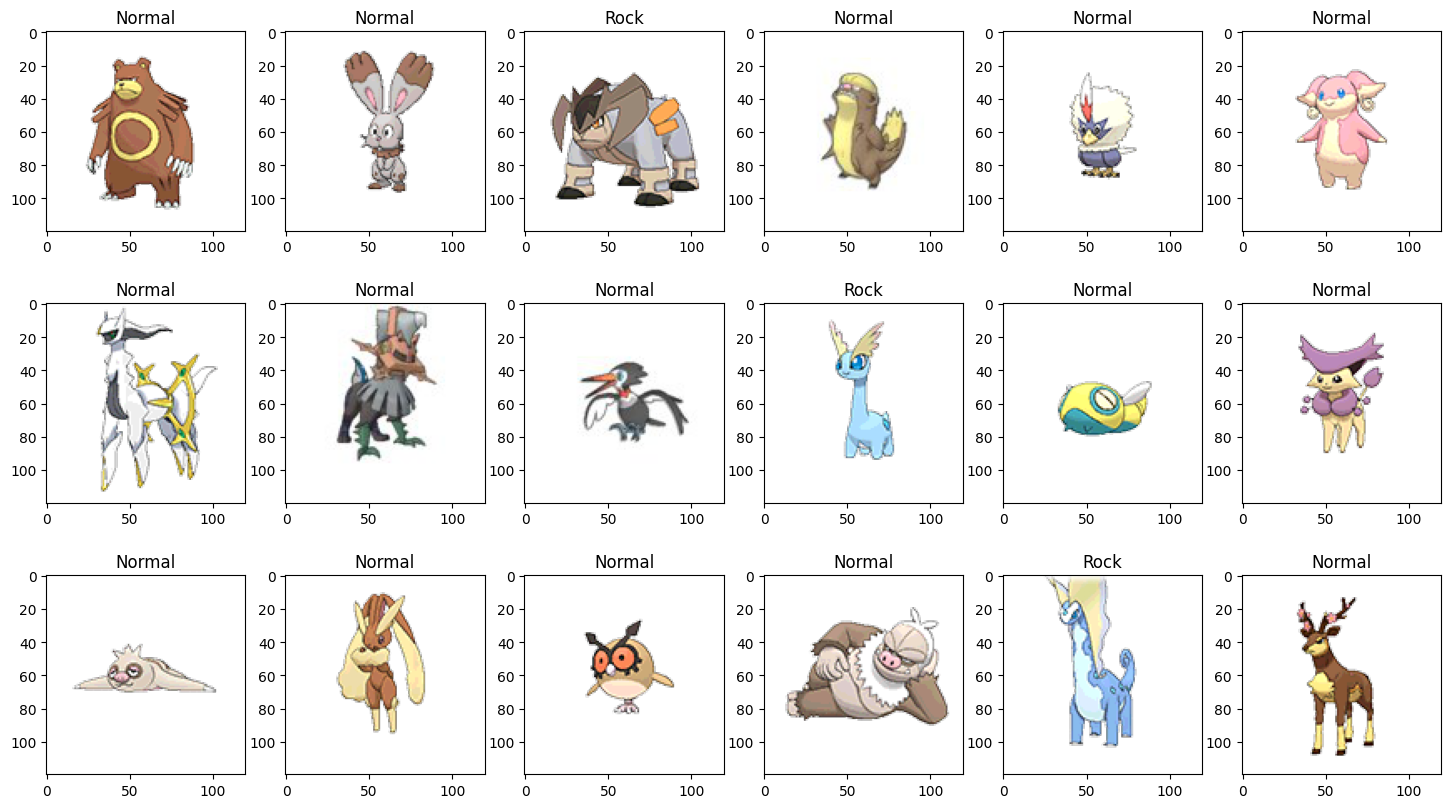

In [10]:
fig,ax=plt.subplots(3,6,figsize=(18,10))

for i in range(3):
    for j in range(6):
        rand=np.random.randint(0,len(df)-1)
        ax[i,j].set_title(df.type[rand])
        ax[i,j].imshow(mpimg.imread(df.filepath[rand]))

# Data Generator

In [11]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2,   
    rescale=1/255
)


train_data = train_gen.flow_from_dataframe(
    df,
    x_col='filepath',
    y_col='type',
    target_size=(120, 120),
    color_mode='rgba',
    class_mode='categorical',
    batch_size=32,
    seed=1,
    subset='training'
)

val_data = train_gen.flow_from_dataframe(
    df,
    x_col='filepath',
    y_col='type',
    target_size=(120, 120),
    color_mode='rgba',
    class_mode='categorical',
    batch_size=32,
    seed=1,
    subset='validation'
)

Found 121 validated image filenames belonging to 2 classes.
Found 30 validated image filenames belonging to 2 classes.


# Make Model

In [12]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(120,120,4)))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(2,activation='sigmoid'))
model.compile(
    optimizer='adam',                 
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
   metrics=['acc']
)

# print model layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 64)      2368      
                                                                 
 conv2d_1 (Conv2D)           (None, 116, 116, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 58, 58, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 54, 54, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 128)      0         
 2D)                                                    

# Train Model

In [13]:
history = model.fit(
    train_data,
    validation_data=val_data,
    batch_size=32,
    epochs=100,  
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_acc',
            patience=10,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100
4/4 [==============================] - 39s 9s/step - loss: 0.9265 - acc: 0.5868 - val_loss: 0.6919 - val_acc: 0.7000 - lr: 0.0010
Epoch 2/100
4/4 [==============================] - 39s 10s/step - loss: 0.6879 - acc: 0.6860 - val_loss: 0.6613 - val_acc: 0.7000 - lr: 0.0010
Epoch 3/100
4/4 [==============================] - 39s 10s/step - loss: 0.6625 - acc: 0.6942 - val_loss: 0.6220 - val_acc: 0.7000 - lr: 0.0010
Epoch 4/100
4/4 [==============================] - 36s 9s/step - loss: 0.6650 - acc: 0.6942 - val_loss: 0.6575 - val_acc: 0.7000 - lr: 0.0010
Epoch 5/100
4/4 [==============================] - 37s 9s/step - loss: 0.6611 - acc: 0.6942 - val_loss: 0.6579 - val_acc: 0.7000 - lr: 0.0010
Epoch 6/100
4/4 [==============================] - 36s 9s/step - loss: 0.6526 - acc: 0.6942 - val_loss: 0.6307 - val_acc: 0.7000 - lr: 0.0010
Epoch 7/100
4/4 [==============================] - 35s 9s/step - loss: 0.6177 - acc: 0.6942 - val_loss: 0.6104 - val_acc: 0.7000 - lr: 0.0010
Epoc

# Results
## Accuracy Graph

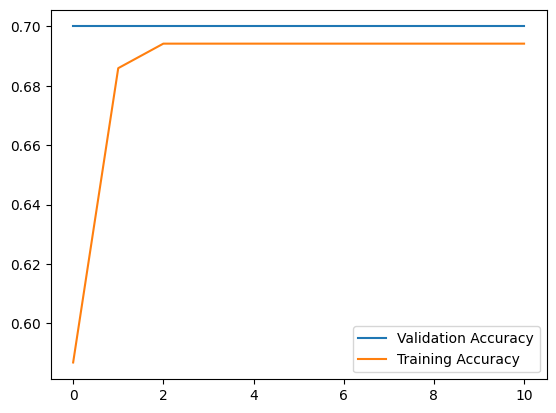

In [14]:
plt.plot(history.history['val_acc'],label='Validation Accuracy')
plt.plot(history.history['acc'],label='Training Accuracy')
plt.legend()

## Loss Graph

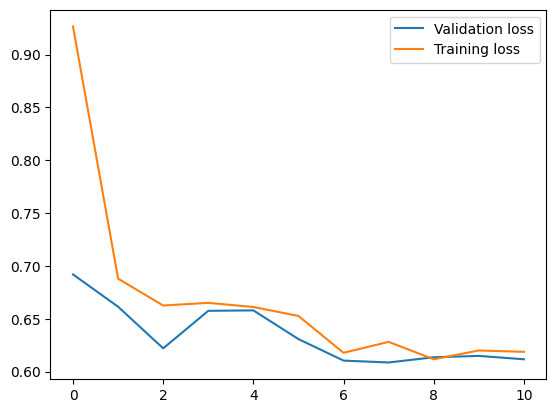

In [15]:
plt.plot(history.history['val_loss'],label='Validation loss')
plt.plot(history.history['loss'],label='Training loss')
plt.legend()

# Save Model

In [16]:
model.save('poke.h5')

# Single Inference

In [17]:
img=mpimg.imread('/content/RAS-Workshop/data/images/squirtle.png')
np.squeeze(img).shape
out=np.argmax(model.predict(np.expand_dims(img,axis=0)))
print(out)

1/1 [==============================] - 0s 254ms/step
0


# Deploy with interface

In [18]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 41.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 K

In [19]:
import gradio as gr



def classify_image(inp):
  new_image = np.zeros((120, 120, 4))

# Copy the original image to the first three channels of the new array
  new_image[:,:,0:3] = inp[:,:,:]

  model = tf.keras.models.load_model('poke.h5')
  prediction=np.argmax(model.predict(np.expand_dims(new_image,axis=0)))
  prediction=int(prediction)
  if prediction==1:
    return "Rock"
  else:
    return "Normal"



gr.Interface(fn=classify_image, 
             inputs=gr.Image(shape=(120,120)),
             outputs=gr.Label(),
            
             ).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://473003a9cf97ef936f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [22]:
weights=model.get_weights()

In [23]:
len(weights)

16